# 🔹UFC Fight Predictor Feature Engineering

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 1. Import Libraries and Setup Environment

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the current working directory
current_dir = os.getcwd()

# Navigate to the project root
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Import from /src
sys.path.append(os.path.join(project_root, 'src'))
from helpers import *
from io_model import *
from data import UFCData

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 2. Load Data

In [2]:
# Define the path to the CSV file
file_path = os.path.join(project_root, 'data', 'processed', 'ufc_etl.csv')

# Load the CSV into a DataFrame
try:
    ufc_df = pd.read_csv(file_path)
    print_header(f"Data loaded succesfully", color='bright_green')
except Exception as e:
    print_header(f"Error loading data: {e}", color='bright_red')

╔═══════════════════════════╗
║  Data loaded succesfully  ║
╚═══════════════════════════╝


<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 3. Initialize UFCData object

In [3]:
ufc_data = UFCData(ufc_df)
ufc_data

📊 UFC Dataset Summary
----------------------------------------
🧪 Total samples      : 6300
🧪 Train/Test split  : 5040 / 1260
🧪 Total features     : 58

🔢 Numerical features : 54
🔠 Categorical features: 4
    - Binary          : 2
    - Multiclass      : 2

🏷 Label distribution (raw):
   - Class 0: 3662 (58.1%)
   - Class 1: 2638 (41.9%)

✅ No missing values detected

📈 Feature summary statistics (train set):
                                mean      std      min       max
RedOdds                     -115.702  279.516 -2100.00   775.000
BlueOdds                      59.744  253.515 -1200.00  1300.000
NumberOfRounds                 3.193    0.588     3.00     5.000
BlueCurrentLoseStreak          0.494    0.789     0.00     6.000
BlueCurrentWinStreak           0.968    1.427     0.00    12.000
BlueDraws                      0.020    0.143     0.00     2.000
BlueLongestWinStreak           1.922    1.961     0.00    17.000
BlueLosses                     1.842    2.154     0.00    16.000
Blu

## 4. Feature Engineering

### Categorical Data

### Stance
- **Orthodox Stance:** A fighter in orthodox stance leads with their left foot and left hand, making it the natural stance for right-handed individuals. 
- **Southpaw Stance:** A fighter in southpaw stance leads with their right foot and right hand, making it the natural stance for left-handed individuals. 
- **Open Stance Matchup:** When one fighter is orthodox and the other is southpaw, it creates an "open stance" matchup. This differs from a "closed stance" where both fighters are in the same stance (e.g., both orthodox or both southpaw)
- **Switch:** When a fighter switches from an orthodox to a southpaw stance or vice versa, it can disrupt their opponent's rhythm, causing them to miss or react incorrectly to strikes. 

### Feature Construction

In [4]:
# Finish Rate (Red & Blue):
RedFinishRate = (ufc_df['RedWinsByKO'] + ufc_df['RedWinsBySubmission'] + ufc_df['RedWinsByTKODoctorStoppage']) / ufc_df['RedWins'].replace(0, 1)
BlueFinishRate = (ufc_df['BlueWinsByKO'] + ufc_df['BlueWinsBySubmission'] + ufc_df['BlueWinsByTKODoctorStoppage']) / ufc_df['BlueWins'].replace(0, 1)
ufc_df['FinishRateDif'] = BlueFinishRate - RedFinishRate

In [5]:
#Win Ratio (Red & Blue)
RedWinRatio = ufc_df['RedWins'] / (ufc_df['RedWins'] + ufc_df['RedLosses']).replace(0, 1)
BlueWinRatio = ufc_df['BlueWins'] / (ufc_df['BlueWins'] + ufc_df['BlueLosses']).replace(0, 1)
ufc_df['WinRatioDif']= BlueWinRatio - RedWinRatio 

In [6]:
# Experience per Age
RedExpPerAge = ufc_df['RedTotalRoundsFought'] / ufc_df['RedAge']
BlueExpPerAge = ufc_df['BlueTotalRoundsFought'] / ufc_df['BlueAge']
ufc_df['ExpPerAgeDif'] = BlueExpPerAge - RedExpPerAge

In [7]:
# Reach Advantage Ratio
ufc_df['ReachAdvantageRatioDif'] = ufc_df['BlueReachCms'] / ufc_df['RedReachCms']

In [8]:
# Height/Reach Ratio
RedHeightReachRatio = ufc_df['RedHeightCms'] / ufc_df['RedReachCms']
BlueHeightReachRatio = ufc_df['BlueHeightCms'] / ufc_df['BlueReachCms']
ufc_df['HeightReachRatioDif']= BlueHeightReachRatio - RedHeightReachRatio

In [9]:
# Win By Decision
BlueWinsByDecision = ufc_df[['BlueWinsByDecisionMajority', 'BlueWinsByDecisionSplit', 'BlueWinsByDecisionUnanimous']].sum(axis=1)
RedWinsByDecision = ufc_df[['RedWinsByDecisionMajority', 'RedWinsByDecisionSplit', 'RedWinsByDecisionUnanimous']].sum(axis=1)
ufc_df['WinsByDecisionDif']=BlueWinsByDecision- RedWinsByDecision

In [10]:
# Decision Rate
BlueDecisionRate = BlueWinsByDecision / ufc_df['BlueWins'].replace(0, 1)  # Evitar división por cero
RedDecisionRate = RedWinsByDecision  / ufc_df['RedWins'].replace(0, 1)  # Evitar división por cero
ufc_df['DecisionRateDif']= BlueDecisionRate - RedDecisionRate

In [11]:
# Odds Dif
ufc_df['OddsDif'] = ufc_df['BlueOdds'] - ufc_df['RedOdds']

In [12]:
# # AvgSigStrLandedDif
# ufc_df['AvgSigStrLandedDif'] = ufc_df['BlueAvgSigStrLanded'] - ufc_df['RedAvgSigStrLanded']

In [13]:
# # AvgSigStrPctDif
# ufc_df['AvgSigStrPctDif'] = ufc_df['BlueAvgSigStrPct'] - ufc_df['RedAvgSigStrPct']

In [14]:
# # AvgSubAttDif
# ufc_df['AvgSubAttDif'] = ufc_df['BlueAvgSubAtt'] - ufc_df['RedAvgSubAtt']

In [15]:
# # AvgTDLandedDif
# ufc_df['AvgTDLandedDif'] = ufc_df['BlueAvgTDLanded'] - ufc_df['RedAvgTDLanded']

In [16]:
# # AvgTDPctDif
# ufc_df['AvgTDPctDif'] = ufc_df['BlueAvgTDPct'] - ufc_df['RedAvgTDPct']

## 5. Update UFCData object

In [17]:
ufc_data = UFCData(ufc_df)
ufc_data

📊 UFC Dataset Summary
----------------------------------------
🧪 Total samples      : 6300
🧪 Train/Test split  : 5040 / 1260
🧪 Total features     : 66

🔢 Numerical features : 62
🔠 Categorical features: 4
    - Binary          : 2
    - Multiclass      : 2

🏷 Label distribution (raw):
   - Class 0: 3662 (58.1%)
   - Class 1: 2638 (41.9%)

✅ No missing values detected

📈 Feature summary statistics (train set):
                                mean      std       min       max
RedOdds                     -115.702  279.516 -2100.000   775.000
BlueOdds                      59.744  253.515 -1200.000  1300.000
NumberOfRounds                 3.193    0.588     3.000     5.000
BlueCurrentLoseStreak          0.494    0.789     0.000     6.000
BlueCurrentWinStreak           0.968    1.427     0.000    12.000
BlueDraws                      0.020    0.143     0.000     2.000
BlueLongestWinStreak           1.922    1.961     0.000    17.000
BlueLosses                     1.842    2.154     0.000    1

## 6. Feature Selection

Dado lo siguiente:
-  LoseStreakDif: BlueCurrentLoseStreak - RedCurrentLoseStreak
-  WinStreakDif: BlueCurrentWinStreak - RedCurrentWinStreak
-  LongestWinStreakDif: BlueLongestWinStreak - 'RedLongestWinStreak
-  WinDif: BlueWins - RedWins
-  LossDif: BlueLosses - RedLosses
-  TotalTitleBoutDif: BlueTotalTitleBouts - RedTotalTitleBouts
-  KODif: BlueWinsByKO - RedWinsByKO
-  SubDif: BlueWinsBySubmission - RedWinsBySubmission
-  HeightDif: BlueHeightCms - RedHeightCms
-  ReachDif: BlueReachCms - RedReachCms
-  AgeDif: BlueAge - RedAge
-  Odds Dif: BlueOdds - RedOdds
Se eliminan ciertas columnas que pueden ser redundantes.

In [18]:
ufc_df=ufc_df.drop(['BlueCurrentLoseStreak', 'RedCurrentLoseStreak','BlueCurrentWinStreak',
                      'RedCurrentWinStreak','BlueLongestWinStreak', 'RedLongestWinStreak', 'BlueWins',
                      'RedWins','BlueLosses','RedLosses', 'BlueTotalRoundsFought','RedTotalRoundsFought',
                      'BlueTotalTitleBouts', 'RedTotalTitleBouts', 'BlueWinsByKO', 'RedWinsByKO', 'BlueWinsBySubmission',
                      'RedWinsBySubmission','BlueHeightCms','RedHeightCms','BlueReachCms','RedReachCms',
                      'BlueAge', 'RedAge', 'BlueOdds','RedOdds'], axis=1)

También aquellas relacionadas con los features construidos:
- WinsByDecisionDif
- DecisionRateDif
- FinishRateDif


In [19]:
ufc_df=ufc_df.drop(['BlueWinsByDecisionSplit', 'BlueWinsByDecisionUnanimous',
       'BlueWinsByTKODoctorStoppage', 'RedWinsByDecisionMajority',
       'RedWinsByDecisionSplit', 'RedWinsByDecisionUnanimous',
       'RedWinsByTKODoctorStoppage','BlueWinsByDecisionMajority'], axis=1)

### Low Variance columns
- BlueDraws
- RedDraws
- BlueWeightLbs
- RedWeightLbs

In [20]:
ufc_df = ufc_df.drop(['BlueDraws','RedDraws','BlueWeightLbs','RedWeightLbs'], axis=1)

## 7. Update UFCData object

In [21]:
ufc_data = UFCData(ufc_df)
ufc_data

📊 UFC Dataset Summary
----------------------------------------
🧪 Total samples      : 6300
🧪 Train/Test split  : 5040 / 1260
🧪 Total features     : 28

🔢 Numerical features : 24
🔠 Categorical features: 4
    - Binary          : 2
    - Multiclass      : 2

🏷 Label distribution (raw):
   - Class 0: 3662 (58.1%)
   - Class 1: 2638 (41.9%)

✅ No missing values detected

📈 Feature summary statistics (train set):
                           mean      std       min       max
NumberOfRounds            3.193    0.588     3.000     5.000
LoseStreakDif             0.068    1.012    -6.000     6.000
WinStreakDif             -0.142    1.887   -18.000    10.000
LongestWinStreakDif      -0.763    2.026   -12.000    14.000
WinDif                   -1.496    4.167   -28.000    23.000
LossDif                   0.102    3.103   -19.000    16.000
TotalRoundDif            -5.599   18.083  -448.000    87.000
TotalTitleBoutDif        -0.308    1.663   -16.000    14.000
KODif                    -0.512    2.14

## 8. Check Correlation Matrix

In [22]:
status = False
ufc_data.compute_corr(processed = status)
ufc_data.top_corr(processed = status)

,Feature 1,Feature 2,Correlation
134,TotalRoundDif,ExpPerAgeDif,0.981060
205,ReachDif,ReachAdvantageRatioDif,0.893983
87,WinDif,TotalRoundDif,0.860521
99,WinDif,ExpPerAgeDif,0.841164
137,TotalRoundDif,WinsByDecisionDif,0.740159
102,WinDif,WinsByDecisionDif,0.734128
263,ExpPerAgeDif,WinsByDecisionDif,0.731751
66,LongestWinStreakDif,WinDif,0.664174
266,ReachAdvantageRatioDif,HeightReachRatioDif,0.641522
185,HeightDif,ReachDif,0.631015


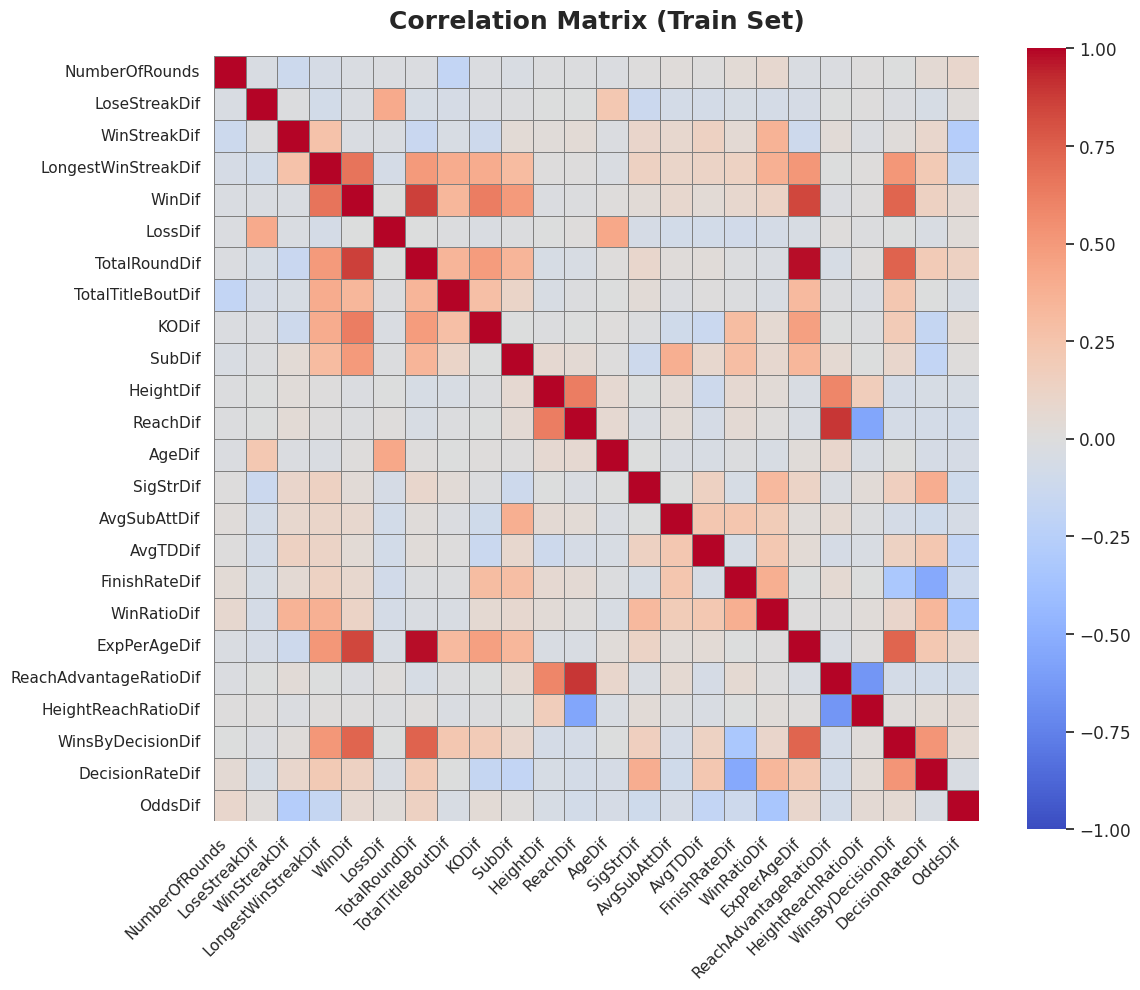

In [23]:
ufc_data.plot_corr(processed = status)

## 9. Redundant Column
- Number of Rounds: Equivalent to Titlebout
- TotalRoundDif: BlueTotalRoundsFought - RedTotalRoundsFought (better to use ExpPerAgeDif)

In [24]:
ufc_df = ufc_df.drop(['NumberOfRounds', 'TotalRoundDif'], axis=1)

In [25]:
# Preview the first few records
display(ufc_df.head())
display(ufc_df.columns)

,TitleBout,Gender,BlueStance,RedStance,LoseStreakDif,WinStreakDif,LongestWinStreakDif,WinDif,LossDif,TotalTitleBoutDif,...,AvgTDDif,label,FinishRateDif,WinRatioDif,ExpPerAgeDif,ReachAdvantageRatioDif,HeightReachRatioDif,WinsByDecisionDif,DecisionRateDif,OddsDif
0,False,MALE,Southpaw,Orthodox,-1,5,-2,-2,0,-4,...,-1.83,1,0.283333,-0.035714,-0.477778,1.055556,-0.065058,-4,-0.283333,-455.0
1,False,MALE,Orthodox,Orthodox,0,0,-2,-12,-9,0,...,0.20,0,0.293233,0.042614,-1.222222,1.000000,0.028571,-9,-0.293233,-272.0
2,False,MALE,Orthodox,Southpaw,-1,4,0,0,-1,0,...,1.72,0,0.500000,0.095238,-0.077799,0.955882,0.028733,-2,-0.500000,705.0
3,False,MALE,Orthodox,Orthodox,1,0,-1,3,5,0,...,-3.62,1,-0.100000,-0.261905,0.453704,0.987013,0.025803,2,0.100000,610.0
4,False,MALE,Orthodox,Orthodox,0,3,-2,-3,-2,0,...,0.25,1,-0.607143,0.222222,-0.064516,0.985714,0.013872,2,0.607143,-410.0


Index(['TitleBout', 'Gender', 'BlueStance', 'RedStance', 'LoseStreakDif',
       'WinStreakDif', 'LongestWinStreakDif', 'WinDif', 'LossDif',
       'TotalTitleBoutDif', 'KODif', 'SubDif', 'HeightDif', 'ReachDif',
       'AgeDif', 'SigStrDif', 'AvgSubAttDif', 'AvgTDDif', 'label',
       'FinishRateDif', 'WinRatioDif', 'ExpPerAgeDif',
       'ReachAdvantageRatioDif', 'HeightReachRatioDif', 'WinsByDecisionDif',
       'DecisionRateDif', 'OddsDif'],
      dtype='object')

## 10. Update UFCData Object

In [26]:
ufc_data = UFCData(ufc_df)
ufc_data

📊 UFC Dataset Summary
----------------------------------------
🧪 Total samples      : 6300
🧪 Train/Test split  : 5040 / 1260
🧪 Total features     : 26

🔢 Numerical features : 22
🔠 Categorical features: 4
    - Binary          : 2
    - Multiclass      : 2

🏷 Label distribution (raw):
   - Class 0: 3662 (58.1%)
   - Class 1: 2638 (41.9%)

✅ No missing values detected

📈 Feature summary statistics (train set):
                           mean      std       min       max
LoseStreakDif             0.068    1.012    -6.000     6.000
WinStreakDif             -0.142    1.887   -18.000    10.000
LongestWinStreakDif      -0.763    2.026   -12.000    14.000
WinDif                   -1.496    4.167   -28.000    23.000
LossDif                   0.102    3.103   -19.000    16.000
TotalTitleBoutDif        -0.308    1.663   -16.000    14.000
KODif                    -0.512    2.140   -21.000    14.000
SubDif                   -0.322    1.831   -16.000    10.000
HeightDif                -0.076    6.86

## 11. Random Columns Testing

In [27]:
apply = True
ufc_data.add_random_feature(apply=apply)
ufc_data

✅ Added random feature 'Random_Noise' to train/test splits.


📊 UFC Dataset Summary
----------------------------------------
🧪 Total samples      : 6300
🧪 Train/Test split  : 5040 / 1260
🧪 Total features     : 26

🔢 Numerical features : 23
🔠 Categorical features: 4
    - Binary          : 2
    - Multiclass      : 2

🏷 Label distribution (raw):
   - Class 0: 3662 (58.1%)
   - Class 1: 2638 (41.9%)

✅ No missing values detected

📈 Feature summary statistics (train set):
                           mean      std       min       max
LoseStreakDif             0.068    1.012    -6.000     6.000
WinStreakDif             -0.142    1.887   -18.000    10.000
LongestWinStreakDif      -0.763    2.026   -12.000    14.000
WinDif                   -1.496    4.167   -28.000    23.000
LossDif                   0.102    3.103   -19.000    16.000
TotalTitleBoutDif        -0.308    1.663   -16.000    14.000
KODif                    -0.512    2.140   -21.000    14.000
SubDif                   -0.322    1.831   -16.000    10.000
HeightDif                -0.076    6.86

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 12. Check Correlation Matrix

In [28]:
status = False
ufc_data.compute_corr(processed = status)
ufc_data.top_corr(processed = status)

,Feature 1,Feature 2,Correlation
169,ReachDif,ReachAdvantageRatioDif,0.893983
75,WinDif,ExpPerAgeDif,0.841164
78,WinDif,WinsByDecisionDif,0.734128
234,ExpPerAgeDif,WinsByDecisionDif,0.731751
43,LongestWinStreakDif,WinDif,0.664174
238,ReachAdvantageRatioDif,HeightReachRatioDif,0.641522
148,HeightDif,ReachDif,0.631015
65,WinDif,KODif,0.628292
156,HeightDif,ReachAdvantageRatioDif,0.587125
170,ReachDif,HeightReachRatioDif,0.560036


## 13. Inicialize Modeling Data: Standarize Numerical Data & Encode Categorical Data

In [29]:
ufc_data.standardize()
ufc_data.encode()

## 14. Check Modeling Correlation Matrix

In [30]:
status = True
ufc_data.compute_corr(processed = status)
ufc_data.top_corr(processed = status)

,Feature 1,Feature 2,Correlation
444,ReachDif,ReachAdvantageRatioDif,0.893983
203,RedStance_Orthodox,RedStance_Southpaw,0.848349
350,WinDif,ExpPerAgeDif,0.841164
93,BlueStance_Orthodox,BlueStance_Southpaw,0.838789
353,WinDif,WinsByDecisionDif,0.734128
509,ExpPerAgeDif,WinsByDecisionDif,0.731751
318,LongestWinStreakDif,WinDif,0.664174
513,ReachAdvantageRatioDif,HeightReachRatioDif,0.641522
423,HeightDif,ReachDif,0.631015
340,WinDif,KODif,0.628292


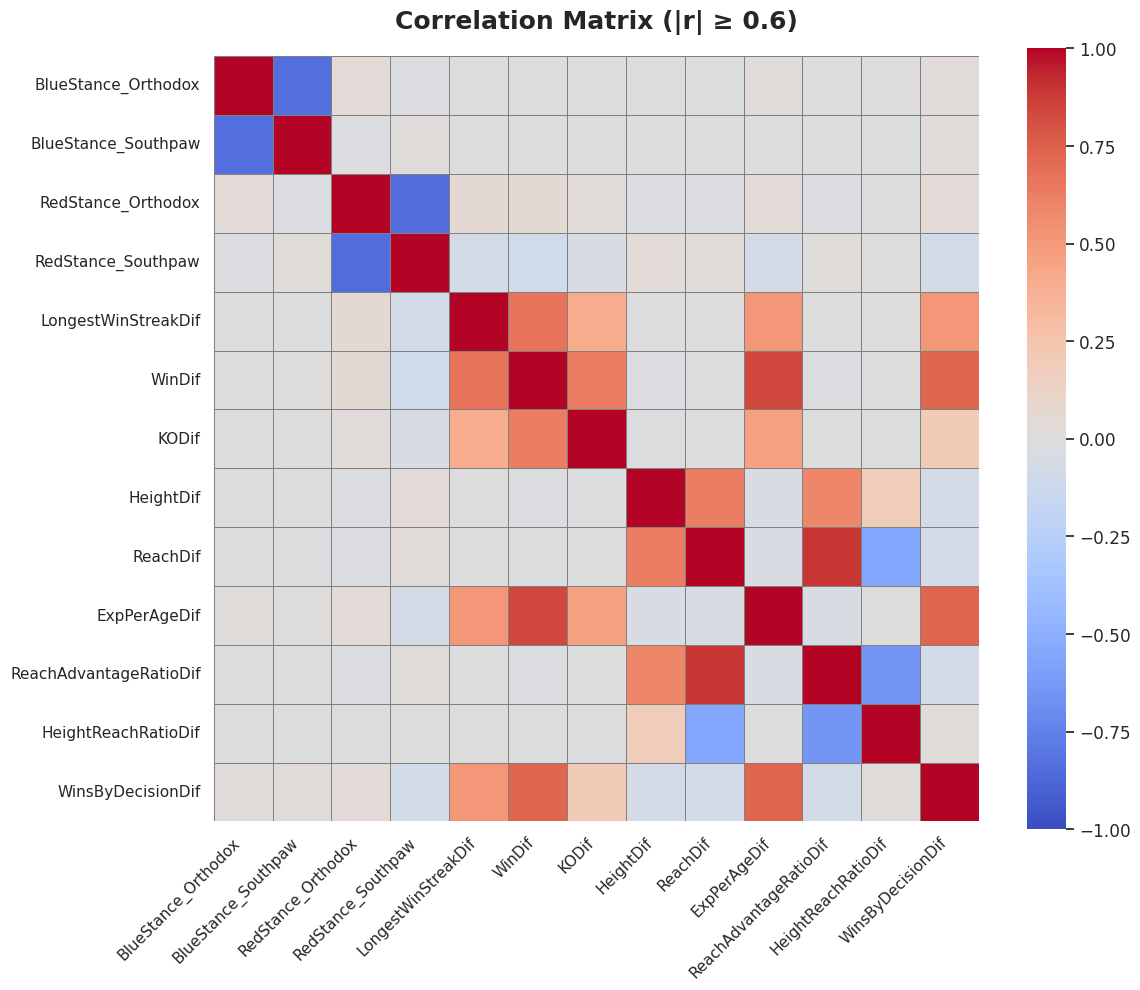

In [31]:
ufc_data.plot_corr(processed = status, threshold = 0.6)

## 15. Check Modeling Data

In [32]:
ufc_data._X_train_processed

,TitleBout,Gender_MALE,BlueStance_Open Stance,BlueStance_Orthodox,BlueStance_Southpaw,BlueStance_Switch,RedStance_Open Stance,RedStance_Orthodox,RedStance_Southpaw,RedStance_Switch,...,AvgTDDif,FinishRateDif,WinRatioDif,ExpPerAgeDif,ReachAdvantageRatioDif,HeightReachRatioDif,WinsByDecisionDif,DecisionRateDif,OddsDif,Random_Noise
220,0,0,0,0,1,0,0,0,1,0,...,-0.098641,0.171029,0.276019,0.475248,-0.644149,0.390532,0.262855,0.127751,-0.896699,-0.422956
2052,0,1,0,1,0,0,0,0,1,0,...,-0.379440,-1.928766,-1.109916,0.000898,-0.901668,1.140561,0.262855,0.127751,0.601441,1.567236
1641,0,0,0,1,0,0,0,1,0,0,...,0.950058,-1.403817,-1.109916,-0.741330,-1.969652,1.286880,-0.141414,-0.416150,-1.203524,0.811743
5261,0,0,0,1,0,0,0,1,0,0,...,0.090469,0.171029,0.276019,0.405015,-2.231865,1.759682,0.262855,0.127751,0.377951,0.351183
3434,0,1,0,1,0,0,0,0,1,0,...,2.669237,1.220927,-0.185960,-0.422578,1.791127,-0.680337,-0.545682,-0.960052,-2.434613,-1.177762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,0,1,0,1,0,0,0,1,0,0,...,-0.230444,-0.878868,-1.109916,-1.368543,0.297958,-0.022437,-0.949951,-0.960052,0.273782,-0.405004
575,0,1,0,0,1,0,0,1,0,0,...,-1.548482,0.730975,-0.070465,-0.361667,-0.914248,1.534356,-0.545682,-0.452410,3.360975,0.415208
761,0,1,0,1,0,0,0,0,0,1,...,-0.568550,-1.928766,-2.495851,0.182564,-0.320029,-0.033662,0.262855,0.127751,1.201834,1.633226
6159,0,1,0,1,0,0,0,1,0,0,...,-1.557078,-0.353919,-1.109916,-1.370873,1.953911,-0.383486,-0.949951,-1.503953,0.652579,0.796673


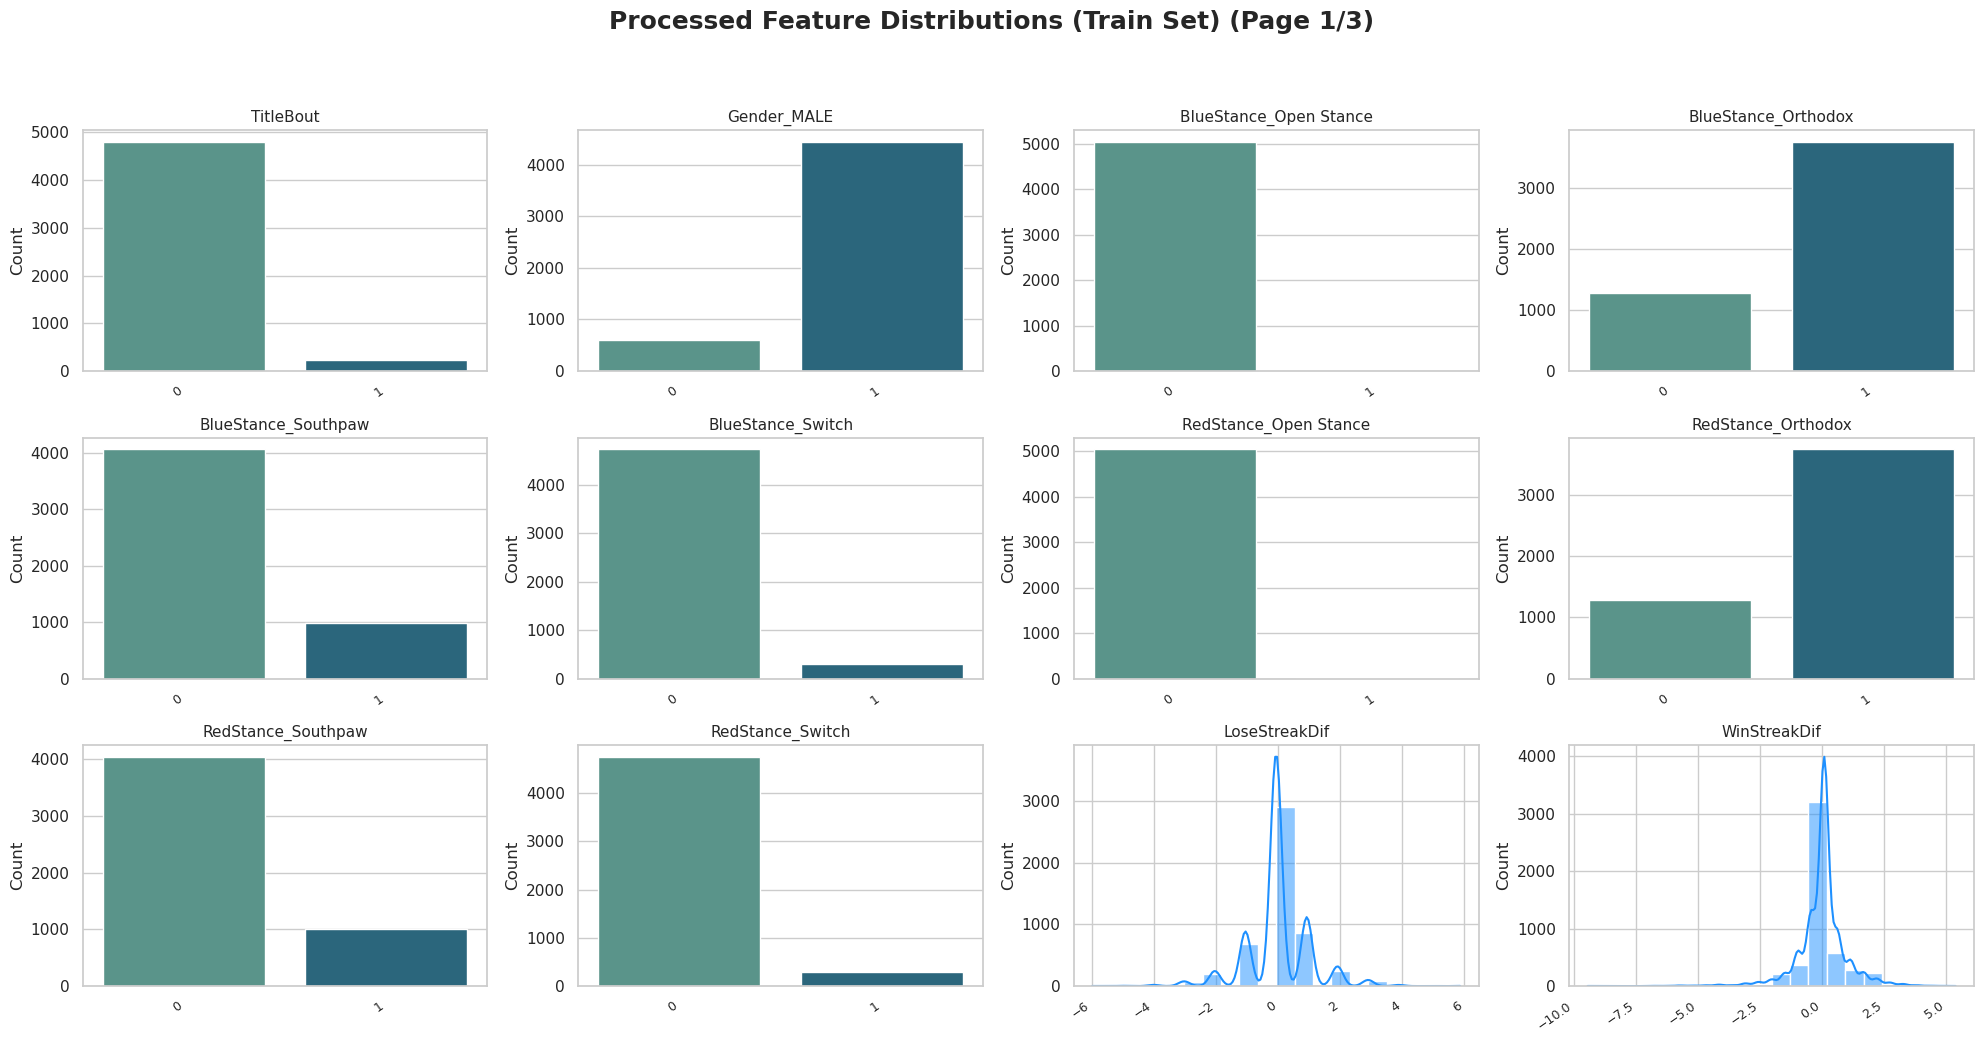

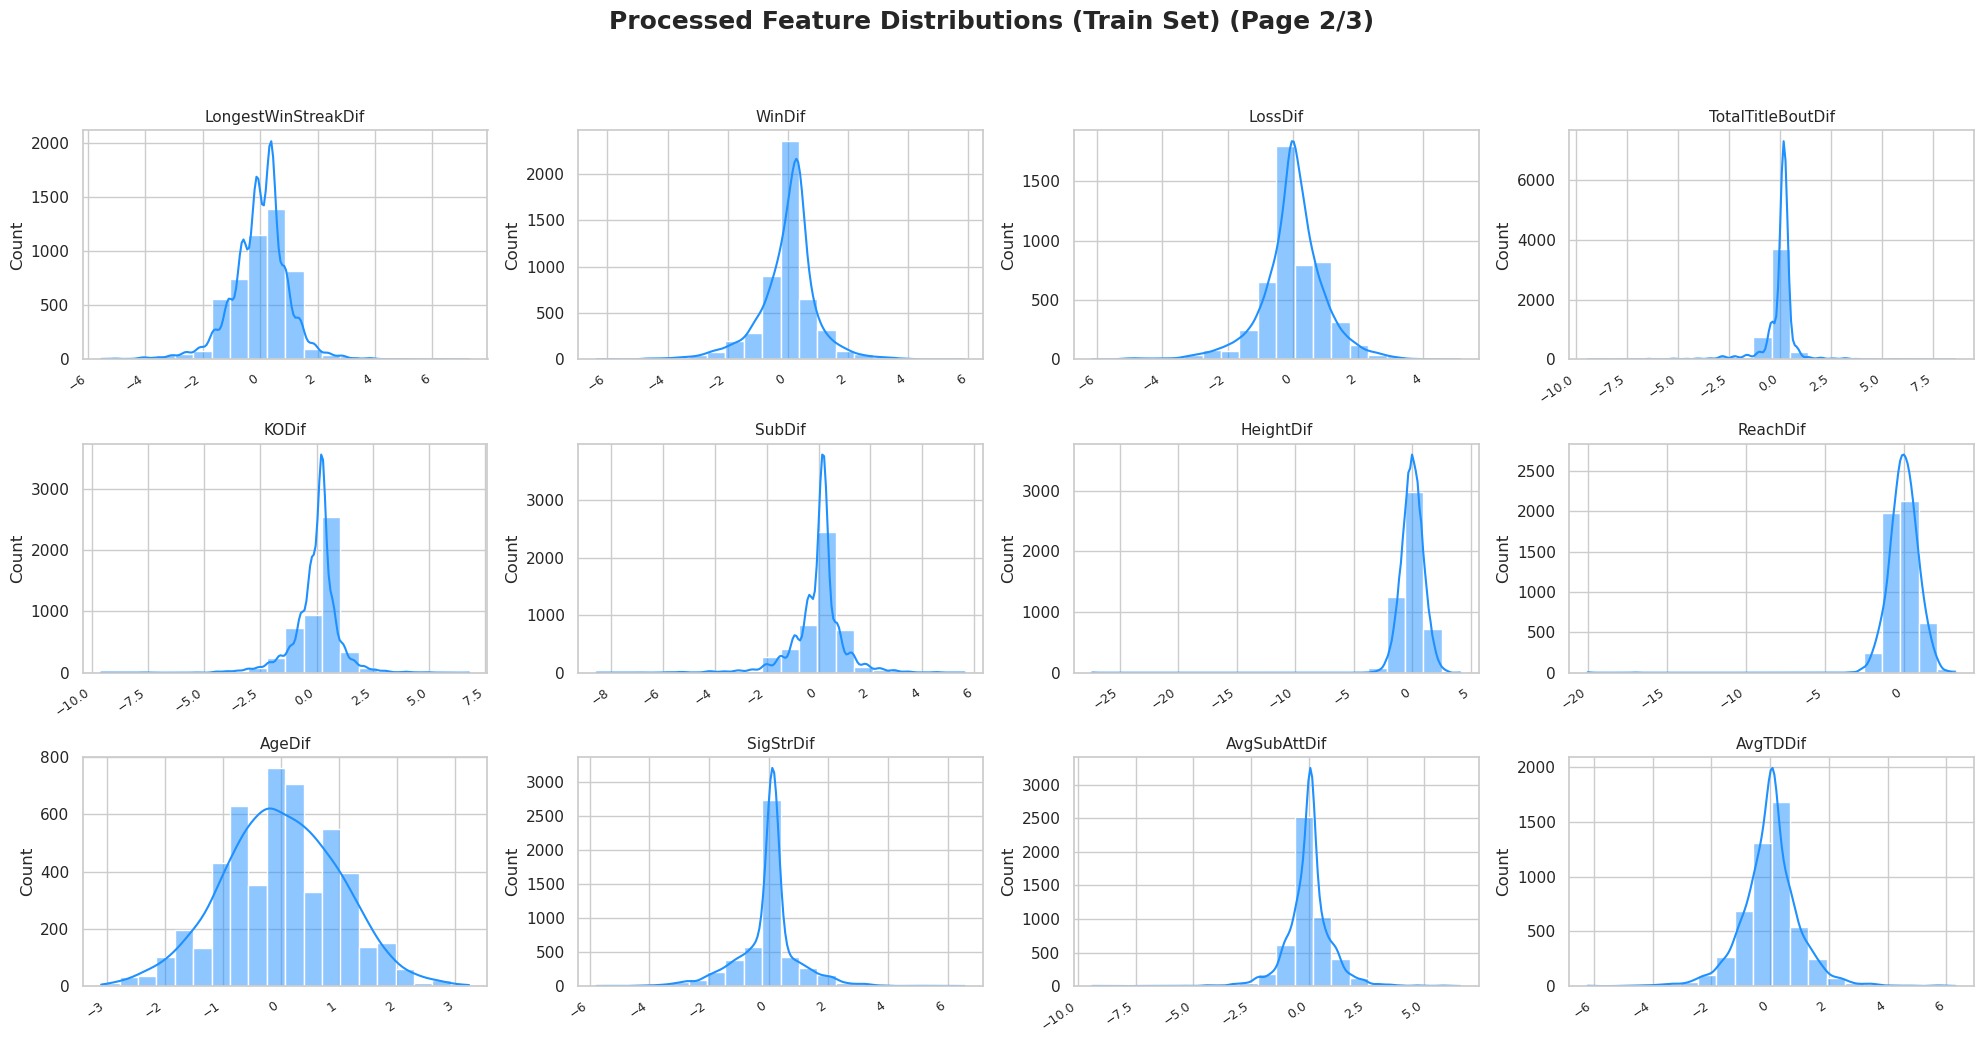

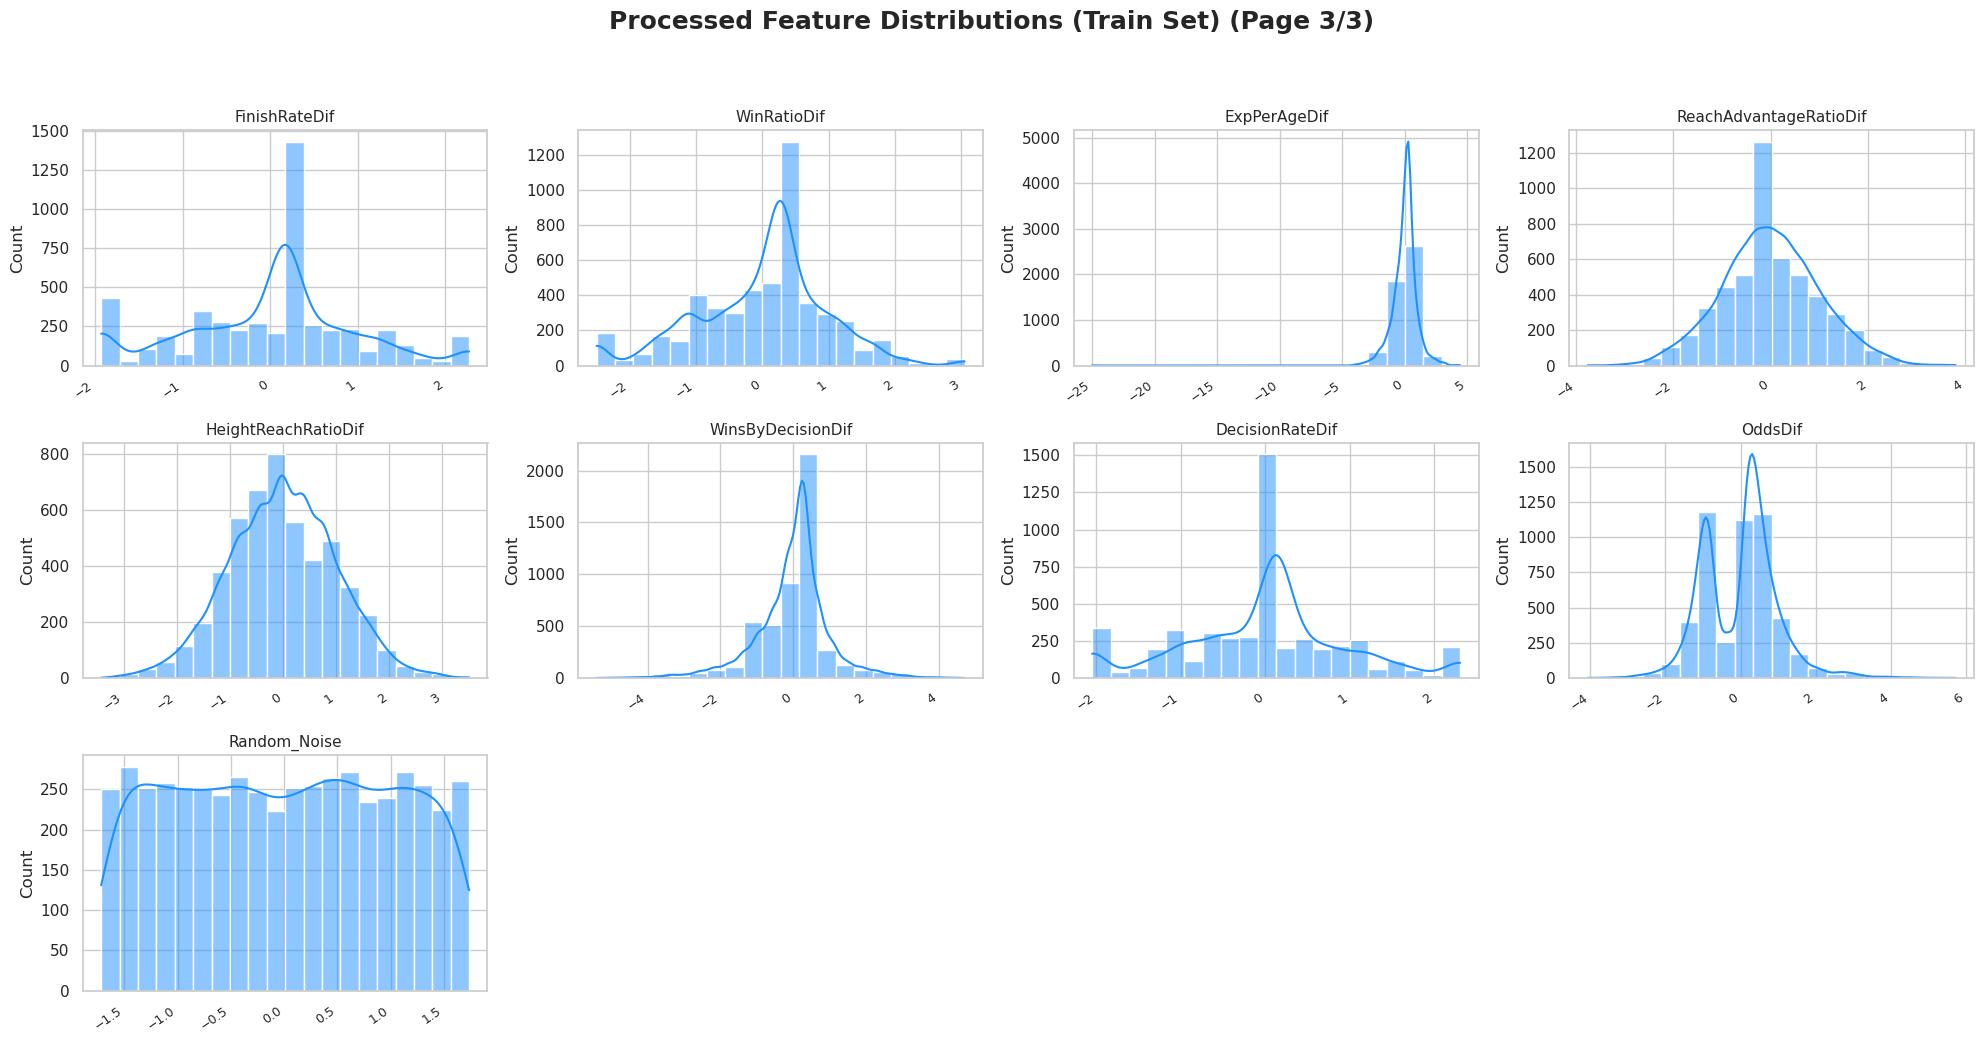

In [33]:
ufc_data.plot_feature_distributions(processed = True)

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 16. Save

In [34]:
ufc_modeling_data = ufc_data

In [35]:
save_data(ufc_modeling_data)

✅ UFCData object saved to: /home/mlioi/ufc-predictor/data/processed/ufc_data.pkl


In [36]:
save_ufc_datasets(ufc_modeling_data, project_root)

✅ UFCData object saved to: dict_keys(['ufc_train.csv', 'ufc_test.csv', 'ufc_processed_train.csv', 'ufc_processed_test.csv'])


<div style="text-align: center;">
     <img src="../img/ufc_logo.png" width="800" /> 
</div>